
# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras and a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. 

### Objective

- Build a baseline classification model then, run a few experiments with different optimizers and learning rates. 
- Don't forget to [**switch to GPU if you're running your notebook on Colab!**](https://colab.research.google.com/notebooks/gpu.ipynb)

## Load Your Data

In [1]:
# imports in first cell 
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# use Sequential to build out your model
from tensorflow.keras.models import Sequential

# Dense layer is used for Fully Connected Forward Feeding networks
from tensorflow.keras.layers import Dense

In [2]:
# load the quickdraw data set
data = np.load('../quickdraw10.npz')

X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)


(100000, 784)
(100000,)


In [3]:
class_names = ['apple',
             'anvil',
             'airplane',
             'banana',
             'The Eiffel Tower',
             'The Mona Lisa',
             'The Great Wall of China',
             'alarm clock',
             'ant',
             'asparagus']

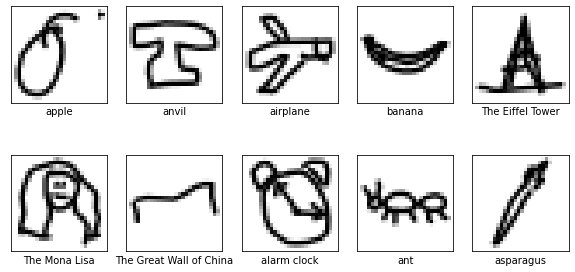

In [4]:
# these are your 10 unique images
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

Say hello to the Quickdraw dataset. 

You'll be using this dataset a lot this week as an alternative to the mnist, which we'll use in the guided projects. The nice thing about this dataset is that it's simple, which allows us to focus on our model, its various components, and gradually come to a better understanding of how to build neural networks without worrying about cleaning and prepping our image data much.

In [5]:
# always a good idea to shuffle your dataset 
X, y = shuffle(X, y)

-----

## Build Your Baseline Model

Make sure that you

- **Determine** the dimensionality of your input data by investigating **X**
- **Normalize** your input data to values between 0 and 1 
- **Determine** the number of neurons in your output layer by investigating **Y**
- **Select** `sparse_categorical_crossentropy` as your loss function.
- **Select** `sgd` as your optimizer.
- **Add** 3 hidden layers to your model with the following number of nodes
    - h1 has 500 nodes
    - h2 has 250 nodes
    - h3 has 100 nodes
    
- **Set** epochs to 20 
- **Use** the `validation_split` keyword in `model.fit()` to automatically create a training / validation dataset from within the model. Specify a percentage, such as `validation_split = 0.2`
 
Not sure what the various parameters are for or what values to assign to them?

- Reference the guided project notebook for Sprint 2 Module 1
- Reference the [**Keras documentation**](https://keras.io/api/)
- Google other examples
- Discuss your results with classmates 

In [6]:
# get dim of image row vectors and save to input_dim
input_dim = X.shape
# get number of unique labels and save to n_output_labels
n_output_labels = len(class_names)
# normalize image data to values between 0 and 1 (by dividing by max pixel value)
X_scaled = X / 255


In [7]:
# a check on your data prep 
assert  X_scaled.max(), "Max pixel value should be 1.0, make sure you normalize your data"

In [15]:
# instantiate a sequential object and call it model, then add layers to your model
model = Sequential()
model.add(Dense(500, input_dim=784, activation="relu"))
model.add(Dense(250, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
len(model.get_config()["layers"])


5

In [17]:
# a check on your model architecture 
n_layers = len(model.get_config()["layers"])
assert n_layers == 5, "You should have 5 layers: input, h1, h2, h3, and output"

In [18]:
# check out your model summary 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 500)               392500    
                                                                 
 dense_10 (Dense)            (None, 250)               125250    
                                                                 
 dense_11 (Dense)            (None, 100)               25100     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [19]:
# fit your model and save training resuts to history 
epochs = 20
history = model.fit(X_scaled, y, 
                    epochs=epochs, 
                    # test set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9826 - accuracy: 0.7130 - val_loss: 0.7437 - val_accuracy: 0.7851
Epoch 2/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6595 - accuracy: 0.8081 - val_loss: 0.6291 - val_accuracy: 0.8133
Epoch 3/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5583 - accuracy: 0.8351 - val_loss: 0.5651 - val_accuracy: 0.8315
Epoch 4/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4925 - accuracy: 0.8547 - val_loss: 0.5193 - val_accuracy: 0.8447
Epoch 5/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4443 - accuracy: 0.8689 - val_loss: 0.4913 - val_accuracy: 0.8569
Epoch 6/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4053 - accuracy: 0.8805 - val_loss: 0.4830 - val_accuracy: 0.8580
Epoch 7/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8903 - val_loss: 0.4672 - val_accuracy:

----
### Visualize the Results

- Move results in `history` to a dataframe. 
- Use [**Seaborn**](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to create line plots for both loss and accuracy by epoch. 
- Analyze the results and write a couple of observations. 

At what point should we have stopped training the model and why? 

In [20]:
# YOUR CODE HERE
df = pd.DataFrame(data=history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.982570,0.713025,0.743715,0.78510
1,0.659490,0.808088,0.629061,0.81330
2,0.558308,0.835100,0.565128,0.83150
3,0.492457,0.854738,0.519331,0.84475
4,0.444274,0.868887,0.491299,0.85695
5,0.405308,0.880500,0.483031,0.85805
6,0.373092,0.890312,0.467181,0.86205
7,0.343523,0.899188,0.449309,0.87035
8,0.317710,0.906937,0.446812,0.86845
9,0.294760,0.913550,0.460722,0.86675


In [21]:
# a check on our model training
assert df.shape[0] == 20, "df should have the training results from 20 epochs"

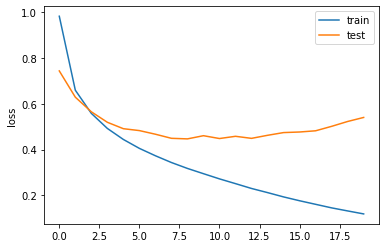

<AxesSubplot:ylabel='accuracy'>

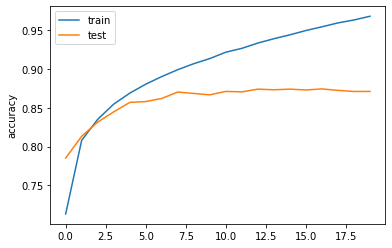

In [22]:
# use the plotting method in your dataframe to plot the modeling results 
sns.lineplot(x=df.index, y=df['loss'], label="train")
sns.lineplot(x=df.index, y=df['val_loss'], label="test")
# YOUR CODE HERE
plt.show()
sns.lineplot(x=df.index, y=df['accuracy'], label="train")
sns.lineplot(x=df.index, y=df['val_accuracy'], label="test")


### Observations 

Based on the plot of the training and validation loss, answer the following questions. 

**Was our model able to learn throughout the 20 epochs? Why or why not?**

The model was able to learn throughout the 20 epochs. There seems to be an overall increase in the accuracy of the model per epoch. 

**Is our model overfitting? Why or why not?**

The model towards the end is heavily overfitting as seen by the second graph. There's a huge increase in train accuracy but little to none in test.

**Could the model score benefit from additional epochs? Why or why not?**

Most likely not as we see that our accuracy has reached some horizontal asymptote.

-----
## Change Optimizers

Let's compare model performance between different optimizers. 
- Build a new model, identical to the last one but using `adam` for the optimizer. 
- Visualize the training results just as we did for the last model. 
- Save modeling results to adam_history, so we don't erase the results from the previous model run

In [23]:
# train same model as above but use sgd if you used adam previously (or use adam if you used sgd previously)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
# a check that we're using the correct optimizer in this model
opt_name = model.optimizer.get_config()["name"]
assert opt_name == "Adam", "you need to use adam for the optimizer in this model."

In [25]:
# fit your model and save training resuts to history
epochs = 20
history = model.fit(X_scaled, y,
                    epochs=epochs,
                    # test set will be generated within the model
                    validation_split=0.2
                    )
 

Epoch 1/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4472 - accuracy: 0.8621 - val_loss: 0.5040 - val_accuracy: 0.8529
Epoch 2/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.3711 - accuracy: 0.8861 - val_loss: 0.4673 - val_accuracy: 0.8645
Epoch 3/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.3180 - accuracy: 0.9017 - val_loss: 0.4500 - val_accuracy: 0.8715
Epoch 4/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9146 - val_loss: 0.4623 - val_accuracy: 0.8717
Epoch 5/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.2342 - accuracy: 0.9267 - val_loss: 0.4976 - val_accuracy: 0.8658
Epoch 6/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.2051 - accuracy: 0.9342 - val_loss: 0.4662 - val_accuracy: 0.8769
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1782 - accuracy: 0.9434 - val_loss: 0.5024 - val_accuracy:

In [27]:
df = pd.DataFrame(data=history.history)

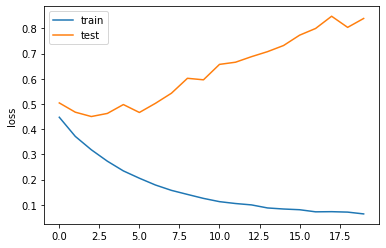

<AxesSubplot:ylabel='accuracy'>

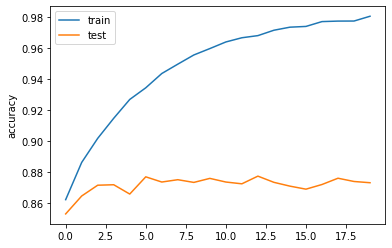

In [28]:
sns.lineplot(x=df.index, y=df['loss'], label="train")
sns.lineplot(x=df.index, y=df['val_loss'], label="test")
# YOUR CODE HERE
plt.show()
sns.lineplot(x=df.index, y=df['accuracy'], label="train")
sns.lineplot(x=df.index, y=df['val_accuracy'], label="test")


### Observations 

This plot should look very different from the previous plot. Based on the plot of the training and validation loss, answer the following questions. 

**Is our model overfitting? Why or why not?**

Yes it seems that the training accuracy goes up quite a bit but the test set does not.

**Could our model's performance improve by training on more than 20 epochs? Why or why not?**

Most likely not for the same reasons above.

**Assuming that you want to stick to this model architecture, what can you do to avoid overfitting?**

Perhaps changing the model or having more samples to fit on would cause it to overfit less.

------
# Conclusion 

You have observed by comparing the two models that are identical except for the optimizer, that the choice of the optimizer can considerably influence the training outcome of ML models in general and in neural networks in particular. 

You might not know 

- why changing the optimizer from Stochastic Gradient Descent over to Adam made a difference.
- how Gradient Descent works 
- or that Adam is known as Adaptive Gradient Descent (i.e., is it a different version of ordinary Gradient Descent). 

But that's ok - tomorrow's lesson will be a deep dive into Gradient Descent. You'll learn the theory of Gradient Descent, we'll code up Gradient Descent from scratch, and we'll talk about how Adam is different from ordinary Gradient Descent. 

-----
# Preparation for Tomorrow 

In preparation for tomorrow, you might need to watch a few videos. I say it might because you may or may not already be comfortable with multi-variate calculus. 

### Theory of Calculus 
The theory of Gradient Descent rests on [**the derivative from Calculus**](https://www.youtube.com/watch?v=WUvTyaaNkzM). If you've never taken a Calculus course before, or are a bit rusty, definitely watch this video in preparation for tomorrow's lesson. The takeaway here is to understand the derivative conceptually; you won't be asked to calculate any derivatives by hand. 

### The Gradient - a Multi-Dimensional Derivative
Once you've watched the previous video, you will be ready to understand how to conceptualize a derivative in an N-dimensional space (where N is any number ranging from 2, 3, 4, ..., all the way to a very large number of dimensions N ). [**This video visually explains the multi-dimensional derivative called the Gradient visually**](https://www.youtube.com/watch?v=GkB4vW16QHI) - and that's the takeaway. The point of this video is to help you understand the Gradient visually using 3D surfaces. You should also know that the Gradient is made up of partial derivatives, more on this tomorrow. 

### Contour Maps 
It is very common to visual 3D surfaces as 2D contour maps - and we'll be making a lot of use of contour maps to understand Gradient Descent. Watch this video to [**understand the relationship between 3D surfaces and 2D contour maps.**](https://www.youtube.com/watch?v=acdX4YamDtU)

### The Calculus of Backpropagation 

Unlike standard Sklearn ML models, neural networks use Gradient Descent and something called Backpropagatin to learn from the data. [**In order to understand how backpropagation works, you need to understand the Chain Rule in Calculus**](https://www.youtube.com/watch?v=acdX4YamDtU). The takeaway here is to understand how a partial derivative can be decomposed into a product of multiple derivatives. 

------
# Stretch Goals

### This Section is Optional!

Only after you've completed the above work and watched the recommended videos are you then encouraged to experiment with building a few more models and analyze their results. 

Here are some suggestions to help you get started. 

- Train the same model using the Sigmoid and Relu activation functions and note the difference in their learning outcomes. [**Keras docs on activation functions**](https://keras.io/api/layers/activations/). We'll cover the Relu activation function in Sprint 2 Module 3.
- Train the same model using normalized and non-normalized data and note the difference in their learning outcomes. 


The objective here is to get more practice with the Keras API (i.e., building models) and run a couple of experiments to help set you up for future lessons. In order words, we'll be discussing different activation functions and the effect of normalized data on model training.